In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pubchem_id =  pd.read_csv('../data/nsc_cid_smiles.csv')
translater = {pubchem_id['SMILES'][i]:pubchem_id['CID'][i] for i in pubchem_id.index}

## Get correlation score

In [3]:
corr = pd.read_csv("../DrugCell/data_rcellminer/weight_corr.csv", index_col=0)
corr.columns = [translater[i] for i in corr.columns]
corr['type'] = ['GO' if 'GO:' in i else 'gene' for i in corr.index]

## Count the occurence of GO terms 

In [4]:
df = corr[corr['type'] == 'GO'].drop('type', axis=1)

In [5]:
t = []
for i in [list(df[i].sort_values(ascending=False)[:20].index) for i in df.columns]:
    t.extend(i)

In [6]:
res = pd.DataFrame([[i, t.count(i)] for i in set(t)]) \
    .sort_values(1, ascending=False) \
    .reset_index(drop=True)
res.index = list(res[0])
res = res.drop(0, axis=1)
res.columns = ['counts']

In [7]:
res.T

,GO:0008150,GO:0048609,GO:0032103,GO:0007610,GO:0010467,GO:0032496,GO:0031329,GO:0043312,GO:0043065,GO:0007423,...,GO:0071634,GO:1904029,GO:1904064,GO:0003091,GO:0072215,GO:0018107,GO:0035162,GO:0032330,GO:0010880,GO:0051236
counts,170,31,27,26,25,24,24,23,23,22,...,1,1,1,1,1,1,1,1,1,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

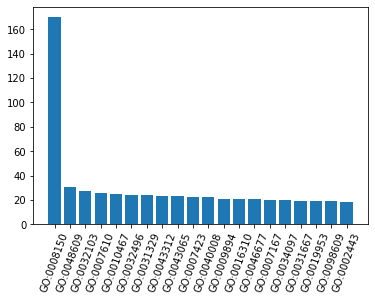

In [8]:
plt.bar(
    res[:20].index,
    res[:20]['counts']
)
plt.xticks(rotation=70)

## Count the occurence of genes

In [9]:
df = corr[corr['type'] == 'gene'].drop('type', axis=1)

In [10]:
t = []
for i in [list(df[i].sort_values(ascending=False)[:20].index) for i in df.columns]:
    t.extend(i)

In [11]:
res = pd.DataFrame([[i, t.count(i)] for i in set(t)]) \
    .sort_values(1, ascending=False) \
    .reset_index(drop=True)
res.index = list(res[0])
res = res.drop(0, axis=1)
res.columns = ['counts']

In [12]:
res.T

,EML4,UGT2B10,PTPRCAP,LGALS4,LAMB4,COL6A6,SIGLEC7,CPM,RBBP9,CYP4X1,...,KIF7,P4HA1,KCNH3,SLC5A2,MAST2,ERAP2,CDK19,SLC29A1,BRD1,SSTR1
counts,205,157,138,137,135,134,133,130,129,94,...,1,1,1,1,1,1,1,1,1,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

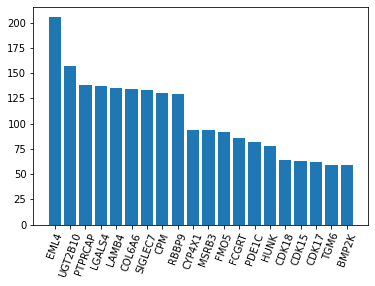

In [13]:
plt.bar(
    res[:20].index,
    res[:20]['counts']
)
plt.xticks(rotation=70)